In [38]:
import pandas as pd
import numpy as np
df=pd.read_csv("BostonHousing (1).csv")

In [39]:
df.shape

(506, 14)

In [40]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [41]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
df.drop(columns=["chas","tax"],inplace=True)

<Axes: >

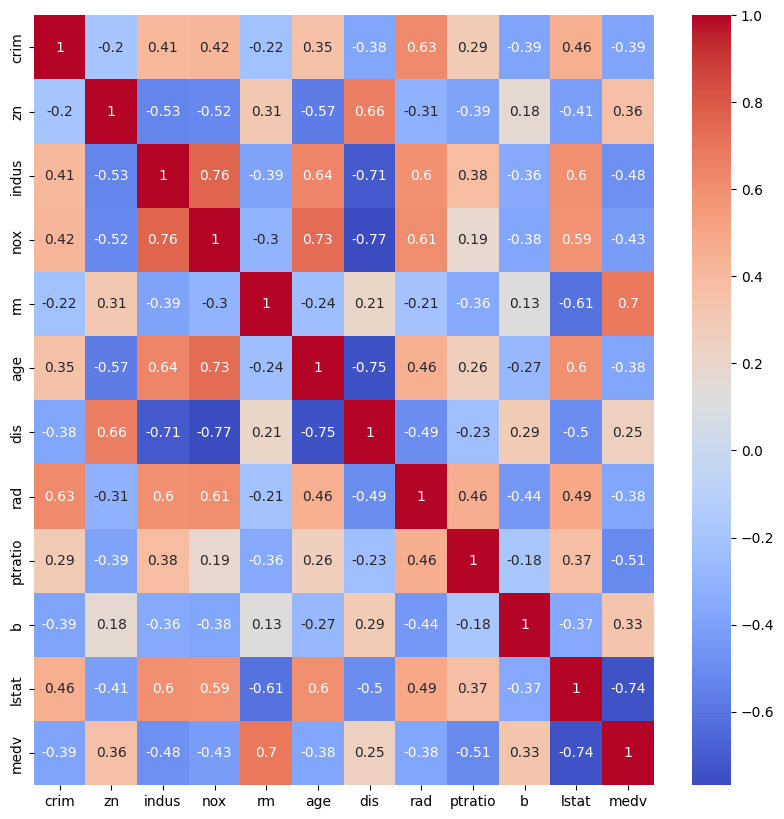

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [44]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
X

,crim,zn,indus,nox,rm,age,dis,rad,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


In [46]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [48]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
svr=SVR()

In [49]:
estimators=[("lr",lr),("dt",dt),("svr",svr)]

In [50]:
for estimator in estimators:
    scores=cross_val_score(estimator[1],X,y,cv=10,scoring="r2")
    print(estimator[0],np.mean(scores))

lr 0.1462074941532105
dt -0.242201277770887
svr -0.2917837249216349


In [58]:
from sklearn.ensemble import VotingRegressor
vr=VotingRegressor(estimators)
scores=cross_val_score(vr,X,y,scoring="r2",cv=10)
print(np.mean(scores))

0.4327225499861299


In [59]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            v1r=VotingRegressor(estimators,weights=[i,j,k])
            scores=cross_val_score(v1r,X,y,scoring="r2",cv=10)
            print(np.round(np.mean(scores)))

0.0
0.0
0.0
0.0


KeyboardInterrupt: 